In [1]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import sys
sys.path.insert(0, '/global/common/cori/contrib/lsst/apps/anaconda/py2-envs/DESCQA/lib/python2.7/site-packages')

In [3]:
#!/global/common/cori/contrib/lsst/apps/anaconda/py2-envs/DESCQA/bin/python 

In [4]:
import subprocess
assert u'lsst' in subprocess.check_output(['groups']).decode().split(), 'You need to be in the `lsst` group for this notebook to work'

In [5]:
import GCRCatalogs

## check version
print('GCRCatalogs =', GCRCatalogs.__version__, '|' ,'GCR =', GCRCatalogs.GCR.__version__)

('GCRCatalogs =', '0.6.9', '|', 'GCR =', '0.6.2')


In [6]:
## list all find available catlaogs, sorted by their name

print('\n'.join(sorted(GCRCatalogs.get_available_catalogs())))


buzzard
buzzard_high-res
buzzard_test
dc1
protoDC2


In [7]:
## load 'protoDC2' catalog

gc = GCRCatalogs.load_catalog('protoDC2')


In [8]:
data = gc.get_quantities(['mag_u_lsst', 'ra', 'dec','mag_i_lsst','redshift','stellar_mass'])


In [9]:
print len(data['ra'])

10022496


(array([  993818.,  1058446.,  1017627.,  1018922.,   919843.,   922605.,
          981588.,  1065746.,  1018159.,  1025742.]),
 array([-2.49999237, -1.9999939 , -1.49999542, -0.99999695, -0.49999847,
         0.        ,  0.49999847,  0.99999695,  1.49999542,  1.9999939 ,
         2.49999237]),
 <a list of 10 Patch objects>)

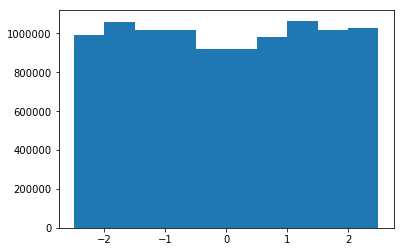

In [10]:
plt.hist(data['ra'])

(array([  984380.,  1033200.,   944604.,   976762.,   965220.,  1021801.,
         1044194.,  1033141.,  1010478.,  1008716.]),
 array([ -2.49999690e+00,  -1.99999726e+00,  -1.49999762e+00,
         -9.99997973e-01,  -4.99998331e-01,   1.31130219e-06,
          5.00000954e-01,   1.00000060e+00,   1.50000024e+00,
          1.99999988e+00,   2.49999952e+00]),
 <a list of 10 Patch objects>)

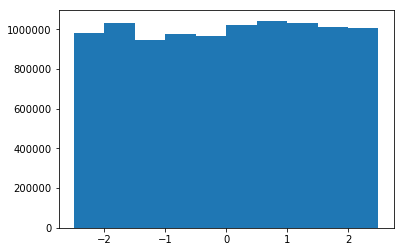

In [11]:
plt.hist(data['dec'])

In [32]:
print(', \n'.join(sorted(gc.list_all_quantities())))


Mag_true_Y_lsst_z0, 
Mag_true_g_lsst_z0, 
Mag_true_g_sdss_z0, 
Mag_true_i_lsst_z0, 
Mag_true_i_sdss_z0, 
Mag_true_r_lsst_z0, 
Mag_true_r_sdss_z0, 
Mag_true_u_lsst_z0, 
Mag_true_u_sdss_z0, 
Mag_true_z_lsst_z0, 
Mag_true_z_sdss_z0, 
bulge_sersic_index, 
convergence, 
dec, 
dec_true, 
disk_sersic_index, 
ellipticity_1, 
ellipticity_2, 
galaxy_id, 
halo_id, 
halo_mass, 
is_central, 
mag_Y_lsst, 
mag_g_lsst, 
mag_g_sdss, 
mag_i_lsst, 
mag_i_sdss, 
mag_r_lsst, 
mag_r_sdss, 
mag_u_lsst, 
mag_u_sdss, 
mag_z_lsst, 
mag_z_sdss, 
magnification, 
position_angle, 
position_x, 
position_y, 
position_z, 
ra, 
ra_true, 
redshift, 
redshift_true, 
shear_1, 
shear_2, 
size_bulge_true, 
size_disk_true, 
size_true, 
stellar_mass, 
velocity_x, 
velocity_y, 
velocity_z


In [29]:
print('\n'.join(sorted(gc.list_all_native_quantities())[:]))


LSST_filters/diskLuminositiesStellar:LSST_g:observed
LSST_filters/diskLuminositiesStellar:LSST_g:observed:dustAtlas
LSST_filters/diskLuminositiesStellar:LSST_g:rest
LSST_filters/diskLuminositiesStellar:LSST_g:rest:dustAtlas
LSST_filters/diskLuminositiesStellar:LSST_i:observed
LSST_filters/diskLuminositiesStellar:LSST_i:observed:dustAtlas
LSST_filters/diskLuminositiesStellar:LSST_i:rest
LSST_filters/diskLuminositiesStellar:LSST_i:rest:dustAtlas
LSST_filters/diskLuminositiesStellar:LSST_r:observed
LSST_filters/diskLuminositiesStellar:LSST_r:observed:dustAtlas
LSST_filters/diskLuminositiesStellar:LSST_r:rest
LSST_filters/diskLuminositiesStellar:LSST_r:rest:dustAtlas
LSST_filters/diskLuminositiesStellar:LSST_u:observed
LSST_filters/diskLuminositiesStellar:LSST_u:observed:dustAtlas
LSST_filters/diskLuminositiesStellar:LSST_u:rest
LSST_filters/diskLuminositiesStellar:LSST_u:rest:dustAtlas
LSST_filters/diskLuminositiesStellar:LSST_y:observed
LSST_filters/diskLuminositiesStellar:LSST_y:observe

In [14]:
moredata = gc.get_quantities(['totalMassStellar','totalStarFormationRate'])

In [15]:
print len(moredata['totalMassStellar'])

10022496


In [16]:
somezs = data['redshift']
somesfr = moredata['totalStarFormationRate']

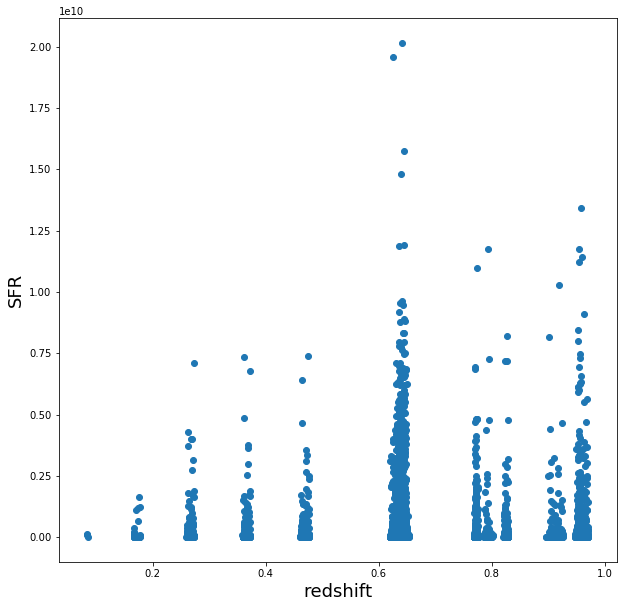

In [17]:
fig = plt.figure(figsize=(10,10))
plt.scatter(somezs[:10000],somesfr[:10000])
plt.xlabel("redshift",fontsize=18)
plt.ylabel("SFR",fontsize=18)

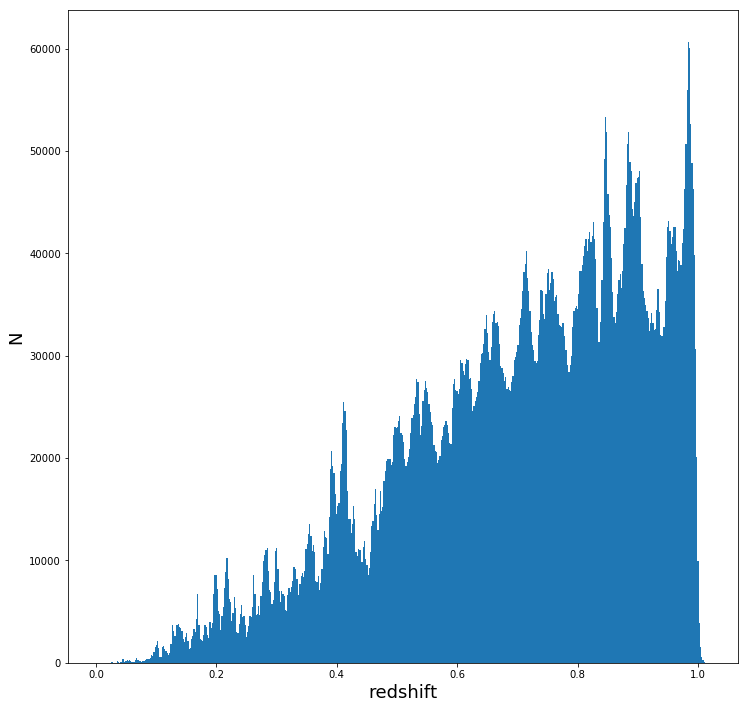

In [18]:
plt.figure(figsize=(12,12))
plt.hist(data['redshift'],bins=500)
plt.xlabel("redshift",fontsize=18)
plt.ylabel("N",fontsize=18)

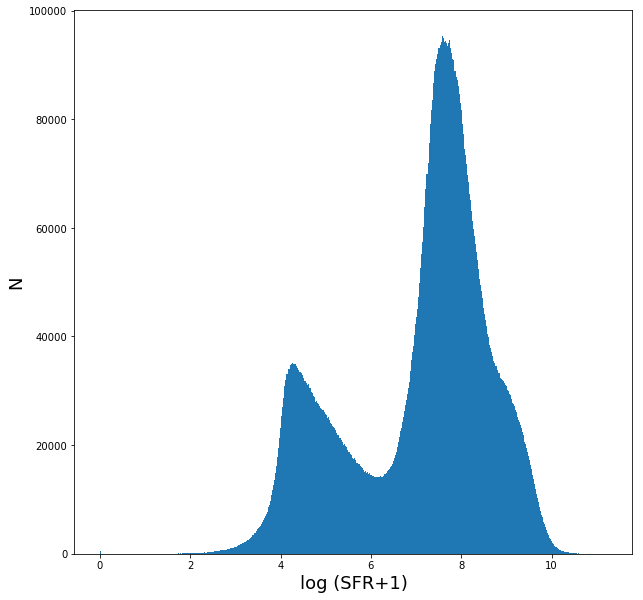

In [19]:
lgsfr = np.log10(moredata['totalStarFormationRate']+1.0)
plt.figure(figsize=(10,10))
plt.hist(lgsfr,bins=500)
plt.xlabel("log (SFR+1)",fontsize=18)
plt.ylabel("N",fontsize=18)

In [20]:
mstar = np.log10(moredata['totalMassStellar'])

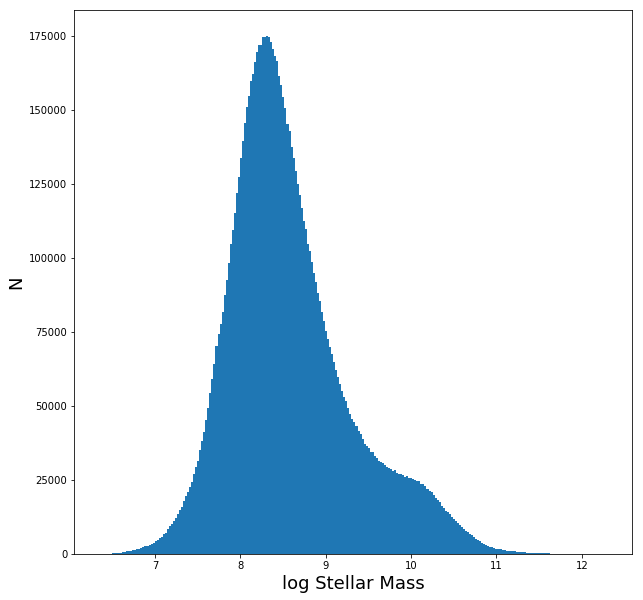

In [21]:
plt.figure(figsize=(10,10))
plt.hist(mstar,bins=250)
plt.xlabel("log Stellar Mass",fontsize=18)
plt.ylabel("N",fontsize=18)

In [22]:
origmstar = np.log10(data['stellar_mass'])

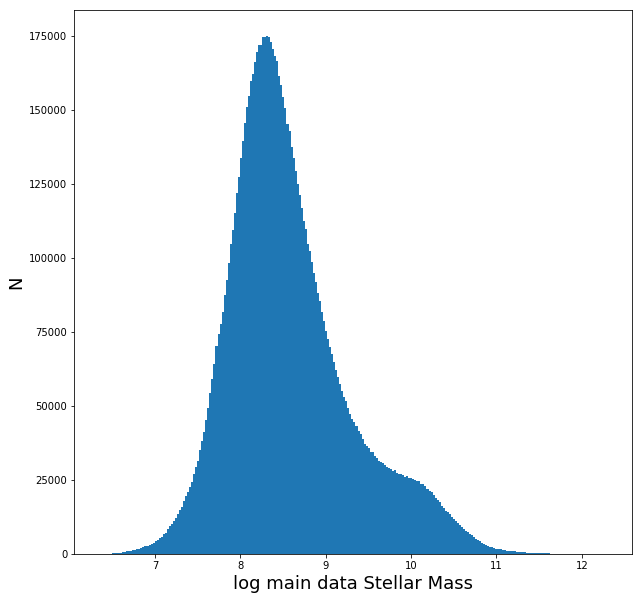

In [23]:
plt.figure(figsize=(10,10))
plt.hist(origmstar,bins=250)
plt.xlabel("log main data Stellar Mass",fontsize=18)
plt.ylabel("N",fontsize=18)

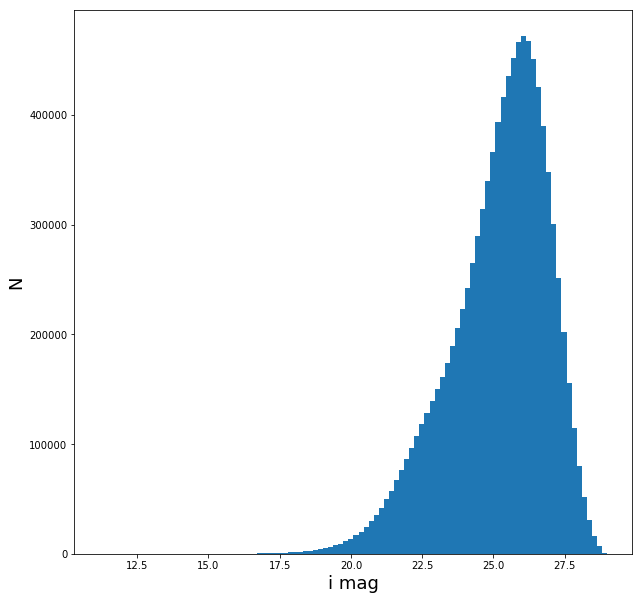

In [34]:
fig = plt.figure(figsize=(10,10))
ivecs = plt.hist(data['mag_i_lsst'],bins=100)
plt.xlabel("i mag",fontsize=18)
plt.ylabel("N",fontsize=18)

In [41]:
print np.argsort(ivecs[0])[-1]
print ivecs[1][83]

83
25.959926375


In [25]:
rdata = gc.get_quantities(['mag_r_lsst'])

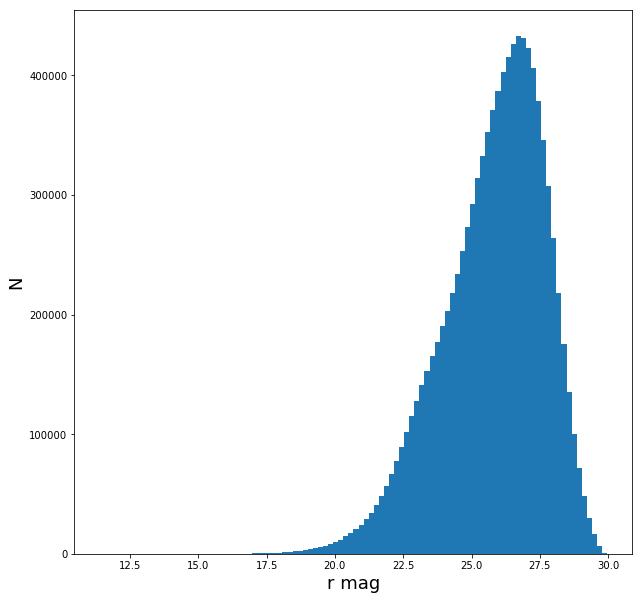

In [26]:
fig = plt.figure(figsize=(10,10))
plt.hist(rdata['mag_r_lsst'],bins=100)
plt.xlabel("r mag",fontsize=18)
plt.ylabel("N",fontsize=18)